In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import model_selection, metrics #TODO use sklearn

In [3]:
#https://www.kaggle.com/datasets/hankelea/system-identification-of-an-electric-motor
electric_motor_df = pd.read_csv("./Dataset_Electric_Motor.csv")
electric_motor_df.head(3)

,id_k,iq_k,epsilon_k,n_k,n_1k,id_k1,iq_k1
0,-81.45802,229.5293,2.240254,5,6,-105.73820,167.3617
1,-140.68210,112.4234,-1.610116,7,2,-174.89710,128.2237
2,-127.07240,171.7438,-1.971891,4,7,-92.96102,126.6081


# Explore Data

In [4]:
electric_motor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40963202 entries, 0 to 40963201
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id_k       float64
 1   iq_k       float64
 2   epsilon_k  float64
 3   n_k        int64  
 4   n_1k       int64  
 5   id_k1      float64
 6   iq_k1      float64
dtypes: float64(5), int64(2)
memory usage: 2.1 GB


In [5]:
electric_motor_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_k,40963202.0,-99.587599,61.260788,-2.399998e+02,-147.143000,-94.019075,-47.931780,-4.461021e-07
iq_k,40963202.0,93.544696,59.331755,3.345040e-07,44.207680,86.517125,138.682900,2.399999e+02
epsilon_k,40963202.0,0.016493,1.809878,-3.141593e+00,-1.544712,0.038389,1.590794,3.141592e+00
n_k,40963202.0,3.780819,2.078624,1.000000e+00,2.000000,4.000000,6.000000,7.000000e+00
n_1k,40963202.0,3.775733,2.079367,1.000000e+00,2.000000,4.000000,6.000000,7.000000e+00
id_k1,40963202.0,-98.772641,64.445248,-2.872808e+02,-147.699875,-94.176355,-47.737943,7.114584e+01
iq_k1,40963202.0,94.810797,61.737501,-1.167833e+01,44.239713,86.807870,139.567200,3.365476e+02


In [6]:
electric_motor_df.isna().sum()

id_k         0
iq_k         0
epsilon_k    0
n_k          0
n_1k         0
id_k1        0
iq_k1        0
dtype: int64

In [7]:
corr_table = electric_motor_df.corr()

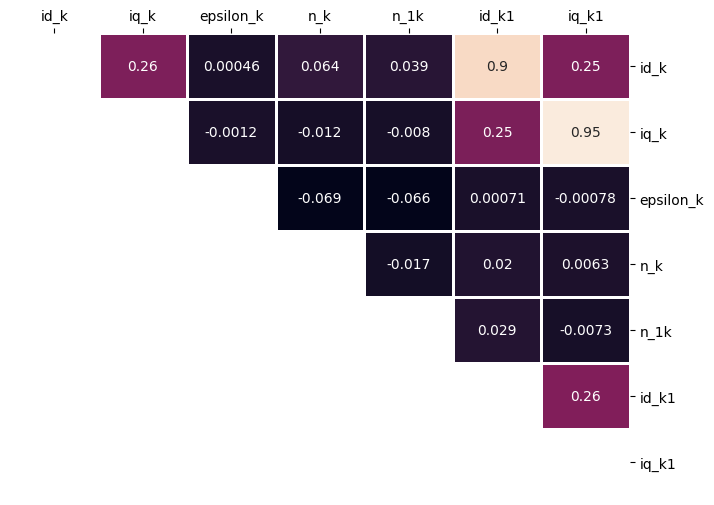

In [8]:
plt.figure(figsize = (8,6))
heat_map = sns.heatmap(data=corr_table,\
                        mask =  np.tri(N=corr_table.shape[0],M=corr_table.shape[1]),\
                        annot=True,linewidth=.75, cbar=False)
heat_map.xaxis.tick_top()
heat_map.yaxis.tick_right()
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.show()

In [9]:
sample_df = electric_motor_df.iloc[::100,:]

In [10]:
print(sample_df.shape)
print(sample_df.columns)

(409633, 7)
Index(['id_k', 'iq_k', 'epsilon_k', 'n_k', 'n_1k', 'id_k1', 'iq_k1'], dtype='object')


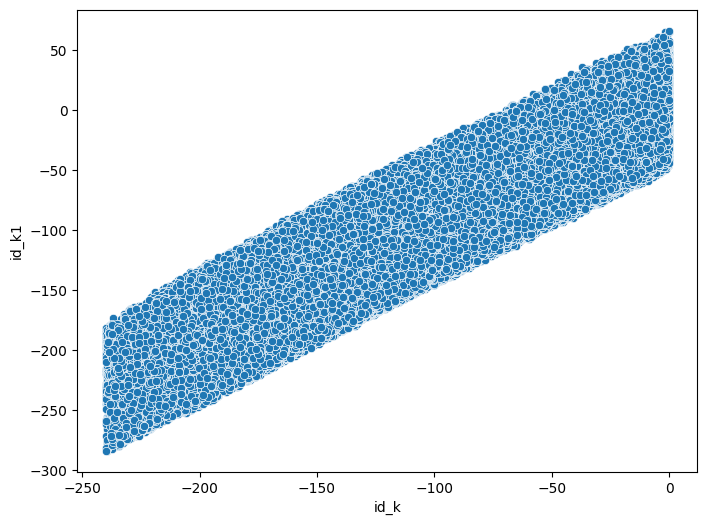

In [11]:
plt.figure(figsize = (8,6))
scatter_id = sns.scatterplot(data=sample_df, \
                            y=sample_df["id_k1"], \
                            x="id_k") 
plt.show()

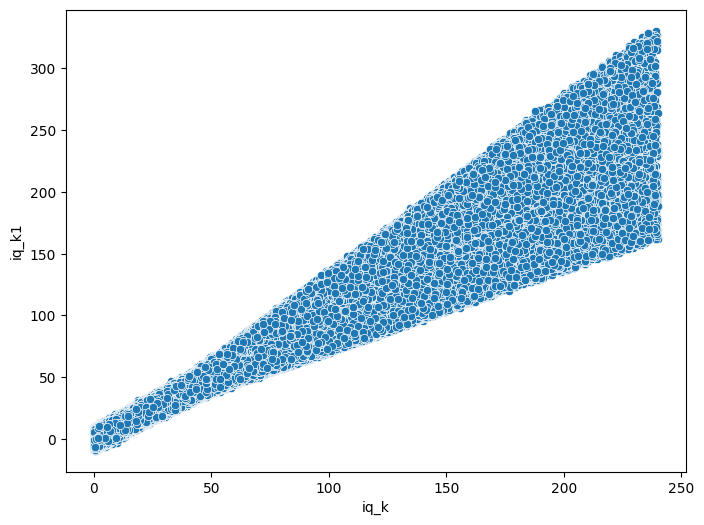

In [12]:
plt.figure(figsize = (8,6))
scatter_id = sns.scatterplot(data=sample_df, \
                            y=sample_df["iq_k1"], \
                            x="iq_k") 
plt.show()

# Model A - No Feature Engineering

<img src="./Model_A_no_feature_eng.png"/>

In [13]:
print(sample_df.shape)
print(sample_df.columns)

(409633, 7)
Index(['id_k', 'iq_k', 'epsilon_k', 'n_k', 'n_1k', 'id_k1', 'iq_k1'], dtype='object')


In [14]:
import statsmodels.formula.api as smf

formula1 = "id_k1 ~ id_k" 

model_i_d = smf.ols(data=electric_motor_df, formula=formula1)

# Create a RegressionResults object
result1 = model_i_d .fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  id_k1   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                 1.778e+08
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:02:11   Log-Likelihood:            -1.9446e+08
No. Observations:            40963202   AIC:                         3.889e+08
Df Residuals:                40963200   BIC:                         3.889e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3255      0.008   -520.122      0.000      -4.342      -4.309
id_k           0.9484   7.11e-05   1.33e+04      0.000       0.948       0.949
==============================================================================
Omnibus:                  4502119.416   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1770053.653
Skew:                           0.299   Prob(JB):                         0.00
Kurtosis:                       2.175   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
formula2 = "iq_k1 ~ iq_k" 

model_i_q = smf.ols(data=electric_motor_df, formula=formula2)

# Create a RegressionResults object
result2 = model_i_q .fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  iq_k1   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 3.516e+08
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:02:34   Log-Likelihood:            -1.8072e+08
No. Observations:            40963202   AIC:                         3.614e+08
Df Residuals:                40963200   BIC:                         3.614e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6912      0.006    462.613      0.000       2.680       2.703
iq_k           0.9848   5.25e-05   1.88e+04      0.000       0.985       0.985
==============================================================================
Omnibus:                  1687321.620   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4058957.036
Skew:                           0.238   Prob(JB):                         0.00
Kurtosis:                       4.467   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model A - Train/Validation/Test
- Prediction just based on currents looks promising. 
- Let's fit model on training data and test accuracy on test data

In [16]:
X = electric_motor_df.iloc[:,:-2]
print(X.shape), print(X.columns), print(X.head(3))

(40963202, 5)
Index(['id_k', 'iq_k', 'epsilon_k', 'n_k', 'n_1k'], dtype='object')
        id_k      iq_k  epsilon_k  n_k  n_1k
0  -81.45802  229.5293   2.240254    5     6
1 -140.68210  112.4234  -1.610116    7     2
2 -127.07240  171.7438  -1.971891    4     7


(None, None, None)

In [17]:
from statsmodels.tools.eval_measures import mse as mean_squared_error

In [18]:
y_i_d = electric_motor_df['id_k1']
y_i_q = electric_motor_df['iq_k1']
print(y_i_d.shape), print(y_i_d.head(3))
print(y_i_q.shape), print(y_i_q.head(3))


(40963202,)
0   -105.73820
1   -174.89710
2    -92.96102
Name: id_k1, dtype: float64
(40963202,)
0    167.3617
1    128.2237
2    126.6081
Name: iq_k1, dtype: float64


(None, None)

In [27]:
X_id_train, X_id_test, y_id_train,y_id_test =\
      model_selection.train_test_split(X['id_k'],y_i_d,\
                                       train_size = 0.8,\
                                       random_state=1)


In [31]:
train_id_df = pd.concat([X_id_train, y_id_train],axis = 1)
print(train_id_df.isna().sum().sum())
print(train_id_df.shape)
train_id_df.head()

0
(32770561, 2)


,id_k,id_k1
7071095,-180.89820,-172.09880
9975451,-131.82420,-145.95830
10359468,-161.12300,-147.99990
37067815,-72.65946,-21.88216
20933928,-159.49030,-128.19000


In [37]:
model_id = smf.ols(data=train_id_df, formula="id_k1 ~ id_k")
fitted_model_id = model_id.fit()
predicted_id = fitted_model_id.predict(X_id_test)
score_id = mean_squared_error(y_id_test,predicted_id)
print(score_id)

778.0890173895981


In [ ]:
# X_iq_train, X_iq_test, y_iq_train,y_iq_test = model_selection.train_test_split(X,y_i_q,random_state=1)

# Feature Engineering
- cos(motor angle) to make continuous
- one hot encode switch state vectors (n_1k, n_1k)
- vector norm 

In [ ]:
# print(electric_motor_df['n_k'].unique())
# print(electric_motor_df['n_1k'].unique())


In [ ]:
# from itertools import permutations

# vn = ['1', '2', '3','4','5','6','7']
# perm_length = 2

# perm_list = list(permutations(vn, perm_length))
# print(len(perm_list))